In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [2]:
import os
def path(img):
    base = '/mnt/c/Users/dell/desktop/pfe/regression'
    return os.path.join(base, img)

In [3]:
dataset_x = [3, 3.2, 3.6, 4]
dataset_y = [5.6, 6.1, 6.8, 7.2]
dataset = { 'x': dataset_x, 'y': dataset_y }
df = pd.DataFrame.from_dict(dataset)
df.index += 1
df

,x,y
1,3.0,5.6
2,3.2,6.1
3,3.6,6.8
4,4.0,7.2


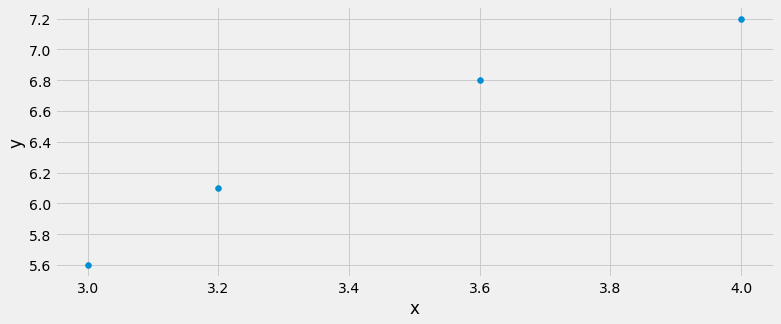

In [24]:
with plt.style.context('fivethirtyeight'):
    plt.scatter(df.x, df.y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.tight_layout()
#     plt.savefig(path('scatter.png'), transparent=True)
    fig = plt.gcf()
    fig.set_size_inches((12.5, 5))
    plt.savefig('/mnt/c/Users/Dell/Desktop/blog/linear-regression/scatter.png', transparent=True)
    plt.show()

In [5]:
def get_y(x, a, b):
    a *= 2
    b *= 2
    return a * x + b

x = np.linspace(3, 4, 100)
y = np.vectorize(get_y)

In [46]:
with plt.style.context('fivethirtyeight'):
    ab = [(0.2, 1.33), (1.9, 0.67), (1.2, 1.76)]
    for (a, b) in ab:
        plt.plot(x, y(x, a, b), label=f'$a={a} ; b={b}$', linewidth=1)
    plt.scatter(df.x, df.y, label='dataset', color='green')
    plt.legend(framealpha=0.1)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.tight_layout()
    fig = plt.gcf()
    fig.set_size_inches((12.5, 5))
    plt.savefig('/mnt/c/Users/Dell/Desktop/blog/linear-regression/lines2.png', transparent=True)
#     plt.show()

TypeError: estimate() takes 1 positional argument but 3 were given

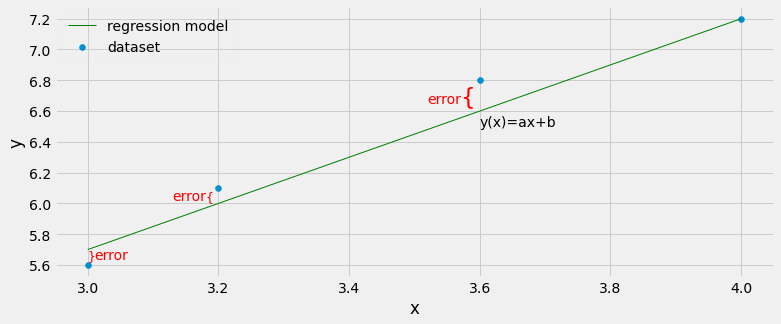

In [47]:
def estimate(x):
    a, b = 1.5, 1.2
    return a * x + b

x = np.linspace(3, 4, 100)
y = np.vectorize(estimate)
    
with plt.style.context('fivethirtyeight'):
    # plots
    plt.scatter(df.x, df.y, label='dataset')
    plt.plot(x, y(x), color='green', linewidth=1, label='regression model')
    
    # texts
    plt.text(3.01, 5.64, 'error', color='red')
    plt.text(3, 5.64, '}', fontsize=12, color='red')
    
    plt.text(3.13, 6.02, 'error', color='red')
    plt.text(3.18, 6.02, '{', fontsize=12, color='red')
    
    plt.text(3.52, 6.65, 'error', color='red')
    plt.text(3.57, 6.65, '{', fontsize=23, color='red')
    
    plt.text(3.6, 6.5, 'y(x)=ax+b')
    
    # plot settings
    plt.legend(framealpha=0.1)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.tight_layout()
#     plt.savefig(path('errors.png'), transparent=True)
#     plt.show()
    fig = plt.gcf()
    fig.set_size_inches((12.5, 5))
    plt.savefig('/mnt/c/Users/Dell/Desktop/blog/linear-regression/errors.png', transparent=True)

In [49]:
xb = df.x.sum() / len(df.x)
yb = df.y.sum() / len(df.y)
def a():
    num = df.x * (df.y - yb)
    denum = df.x * (df.x - xb)
    return num.sum() / denum.sum()

def b():
    return yb - xb * a()

In [50]:
slope = a()
intercept = b()

In [51]:
print(f'Slope: {slope}', f'Intercept: {intercept}', sep='\n')

Slope: 1.5847457627118684
Intercept: 0.9576271186440533


In [52]:
reg = LinearRegression()
reg.fit(df[['x']], df.y)

def y_reg(x):
    a = reg.coef_[0]
    b = reg.intercept_
    return a * x + b

x = np.linspace(3, 4, 50)
y_reg = np.vectorize(y_reg)

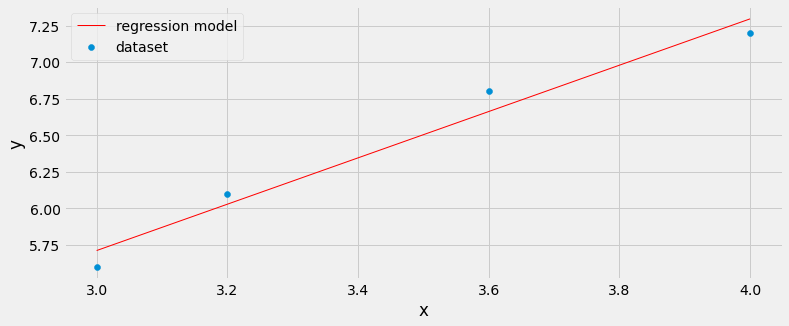

In [54]:
with plt.style.context('fivethirtyeight'):
    plt.scatter(df.x, df.y, label='dataset')
    plt.plot(x, y_reg(x), linewidth=1, color='red', label='regression model')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.tight_layout()
#     plt.savefig(path('regression_line.png'), transparent=True)
    fig = plt.gcf()
    fig.set_size_inches((12.5, 5))
    plt.savefig('/mnt/c/Users/Dell/Desktop/blog/linear-regression/model.png', transparent=True)

In [272]:
# algebric approach
y = df.y
ones = np.ones((4, ))
x = np.transpose(np.hstack((df.x, ones)).reshape(2, 4))
xt = np.transpose(x)
A = np.dot(xt, x)
Ai = np.linalg.inv(A)
xty = np.dot(xt, y)
M = np.dot(Ai, xty)
M

array([1.58474576, 0.95762712])

In [274]:
reg.intercept_

0.9576271186440648

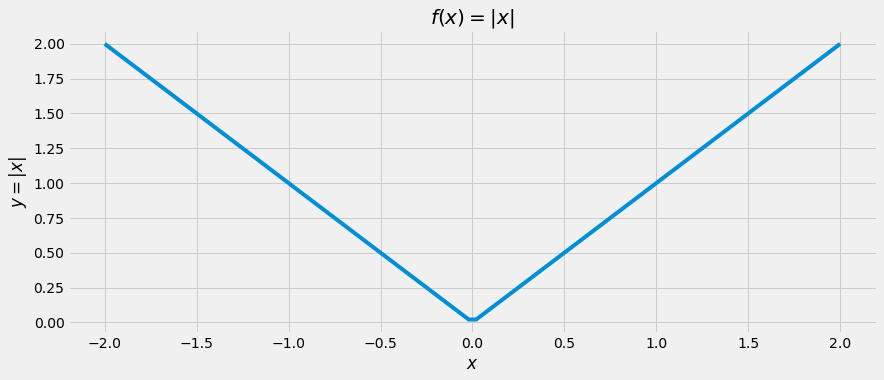

In [61]:
with plt.style.context('fivethirtyeight'):
    x = np.linspace(-2, 2, 100)
    y = np.abs(x)
    plt.plot(x, y)
    fig = plt.gcf()
    fig.set_size_inches((12.5, 5.5))
    plt.xlabel('$x$')
    plt.ylabel('$y=|x|$')
    plt.title('$f(x)=|x|$')
    plt.tight_layout()
    plt.savefig('/mnt/c/Users/Dell/Desktop/blog/linear-regression/abs.png', transparent=True)